In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 43s 4us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

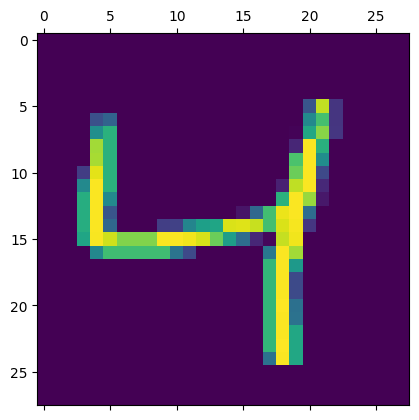

In [20]:
plt.matshow(X_train[2])

In [19]:
y_train[2]

4

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
model = keras.Sequential([
    layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.4743 - accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.2835 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.2669 - accuracy: 0.9247
Epoch 6/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.2619 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 2s 946us/step - loss: 0.2586 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.2555 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.2535 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 2s 905us/

In [45]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 808us/step - loss: 0.2645 - accuracy: 0.9279


[0.2644841969013214, 0.9279000163078308]

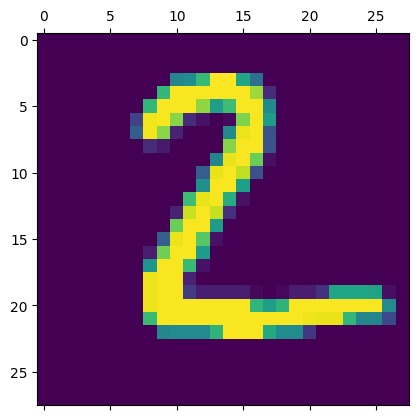

In [33]:
plt.matshow(X_test[1])

In [30]:
y_predicted = model.predict(X_test_flattened)


313/313 [==============================] - 0s 765us/step


In [35]:
np.argmax(y_predicted[1])

2

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    6,    3,    2,    1,    0],
       [   0, 1115,    5,    2,    0,    1,    3,    2,    7,    0],
       [   4,    7,  952,   10,    6,    4,   10,    8,   27,    4],
       [   3,    0,   28,  916,    1,   27,    2,    8,   18,    7],
       [   1,    1,   11,    1,  908,    0,    8,    4,   10,   38],
       [  10,    2,    9,   31,    8,  783,    9,    6,   28,    6],
       [  12,    3,   14,    1,    7,   13,  906,    1,    1,    0],
       [   1,    7,   28,    6,    8,    1,    0,  939,    1,   37],
       [   7,    9,   12,   19,    9,   27,    9,    9,  865,    8],
       [  10,    8,    2,    8,   25,    6,    0,   12,    7,  931]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

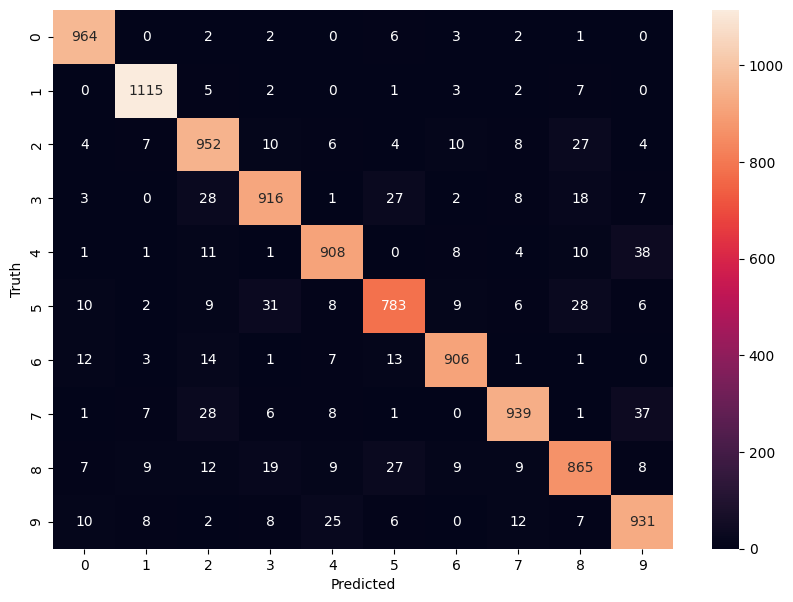

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
# adding a hidden layer to the model above
model = keras.Sequential([
    layers.Dense(100, input_shape=(784,), activation='relu'),
    layers.Dense(100000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 185s 98ms/step - loss: 0.2396 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.1286 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.1008 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0797 - accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0695 - accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0645 - accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0579 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0537 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0480 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================]

In [77]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.1816 - accuracy: 0.9726


[0.18162384629249573, 0.972599983215332]

In [49]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 864us/step


In [56]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [57]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    1,    3,    5,    1,    1,    1],
       [   0, 1125,    2,    1,    0,    1,    2,    2,    2,    0],
       [   6,    2, 1005,    2,    2,    0,    3,    4,    8,    0],
       [   0,    1,    4,  991,    0,    4,    1,    4,    3,    2],
       [   1,    0,    4,    1,  949,    0,    6,    3,    2,   16],
       [   3,    1,    0,   11,    3,  860,    6,    1,    5,    2],
       [   6,    3,    2,    1,    2,    4,  937,    0,    3,    0],
       [   1,    4,   13,    4,    2,    1,    0,  994,    1,    8],
       [   4,    2,    2,    5,    4,    5,    2,    4,  944,    2],
       [   2,    5,    1,    6,   10,    3,    0,    5,    1,  976]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

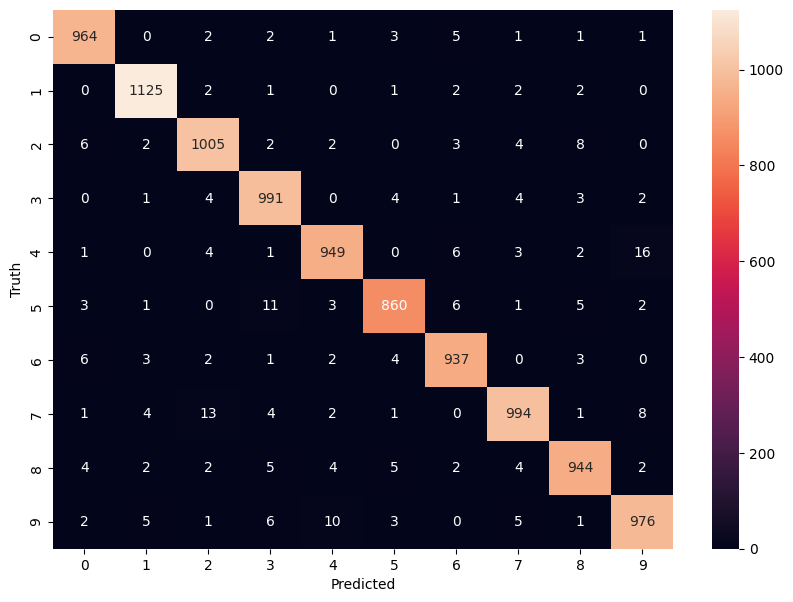

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
# Using flatten layer so we don't have to manually flatten the dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2759 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [63]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 938us/step - loss: 0.0823 - accuracy: 0.9775


[0.08226629346609116, 0.9775000214576721]

In [65]:
y_prediction = model.predict(X_test)
y_prediction_label = [np.argmax(i) for i in y_prediction]

313/313 [==============================] - 0s 788us/step


In [66]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction_label)

Text(95.72222222222221, 0.5, 'Truth')

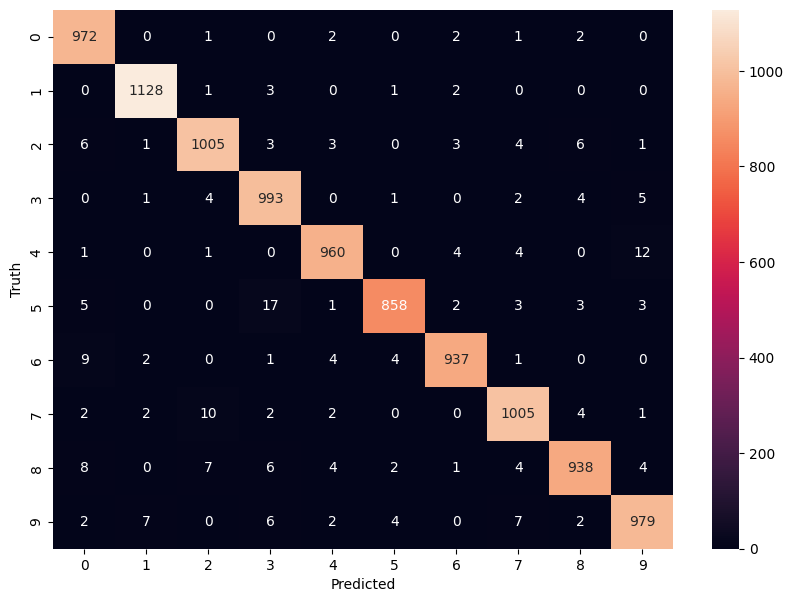

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')